# Assignment 1
## Medical Patient No Show

### Team members: Luay Dajani, Dana Geislinger, Chris Morgan, Caroll Rodriguez
##### Github - https://github.com/cdmorgan103/7331DataMiningNoShow

## Describe the purpose of the data set you selected
We utilized the Kaggle No Show appointment data. it has 110,527 records and 14 attributes. This data was collected from a network of medical locations in Brazil in 2016 and shows the show/no-show behavior of the patients across the different medical facilities (that are identified as the Neighbourhood location).  

No Show in the medical world can be large cost for clinics and health systems. As the institution's capacity becomes more constrained and time to be seen increases, no show is often cited as becoming an increasing issue and many medical systems have gone to extreme lengths to reduce these costly occurences. 

Some clinics have resorted to overbooking, which blah blah blah I'll do more here later guys :)

Dataset from: https://www.kaggle.com/joniarroba/noshowappointments

### Data Understanding

More to do here now that we've figured out the data.... I'll do more here later guys :)

### Data Meaning

### Verify Data Quality

To verify the data quality, the data will be imported the github location and viewed to provide initial exploratory data analysis, and determine if the data requires cleaning or modifications before deeper analysis.  This process includes changing variable types to usable formats.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv('data/KaggleV2-May-2016.csv') #read in the csv file
#View the head of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
#View the imported variable types and determine if changes needed
df.info()
#Show a quick summary of the variables
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [3]:
##Set the patient id to int and change to category/object data types for our binary variables (scholarship, hipertension, etc.)
#declare the categories to be converted to objects & convert the data
categ_features =['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
df[categ_features] = df[categ_features].astype(np.object)

#Convert Patien ID to int as there is no data after the decimal anyways
df.PatientId = df.PatientId.astype(np.int64)

#Since we only have an appointment date and the schedule day only tells us the date time scheduled, we really don't need scheduled time of day... so we will convert both to date only
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'] = pd.DatetimeIndex(df.ScheduledDay).normalize()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Cleaning the data
Luckily this is a reletively clean dataset there are some changes to be made as follows:

-  Though as this dataset came from a foriegn source, some of the colums are misplelled.

-  There are sub zero values for age and two unique patients with an age of 115. This could be documented oddly for perhaps a pregnant mother's child (hence a negative age value since the child isn't born). Since there is no way of knowing if ts only one data point, these values will be simply imputed with the median value for the dataset. It is unlikely the 2 patients who are actually 115, but it is feasible to reach this age, and most likely, these patients true age are within the vicinity of the age documented but are slightly off due to poor birth documentation... In this case the values of 115 and other suspicously high age values will remain the same at this point.

-  Determine how many days in advance the appointment was scheduled and create it as a feature. This will make sure values are reasonable and ensure there are no negative datapoints. Examination shows we do have some datapoints that need to be corrected.

In [4]:
# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})
df.loc[df.Age==-1]
df.loc[df.Age==115]
#Impute the values of sub zero age observations
df.Age=df.Age.replace(-1,37)

# Create a column showing days in advanced
df['DaysInAdvance']=(df['AppointmentDay']-df['ScheduledDay']).dt.days
df.loc[df.DaysInAdvance<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DaysInAdvance
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [5]:
#run through the data to ensure no appointments that are scheduled after the appointment(which would be impossible).
#If true, scheduled day with the appointment day is assumed as the a same day as the appointment, then recalculated advance field
df['ScheduledDay'] = np.where(df['ScheduledDay']>df['AppointmentDay'], df['AppointmentDay'], df['ScheduledDay'])
df['DaysInAdvance']=(df['AppointmentDay']-df['ScheduledDay']).dt.days
#Examine again, we have corrected the bad scheduled appointment data
df.loc[df.DaysInAdvance<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DaysInAdvance


In [6]:
#Create a day of week variable for both the scheduled day and the appointment day which will allows to examining
# any potential trends related to the day of the week and appointment no-show
df['ScheduledDOW'] = df['ScheduledDay'].dt.weekday_name
df['AppointmentDOW'] = df['AppointmentDay'].dt.weekday_name

#Check the variables
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hypertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handicap          110527 non-null object
SMSReceived       110527 non-null object
NoShow            110527 non-null object
DaysInAdvance     110527 non-null int64
ScheduledDOW      110527 non-null object
AppointmentDOW    110527 non-null object
dtypes: datetime64[ns](2), int64(4), object(11)
memory usage: 14.3+ MB


,PatientId,AppointmentID,Age,DaysInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089218,10.183792
std,2.560949e+14,7.129575e+04,23.109921,15.254924
min,3.921700e+04,5.030230e+06,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [7]:
# print out unique values in order to ???
print('Gender:',df.Gender.unique())
print('Age:',sorted(df.Age.unique()))
print('Neighbourhood:',sorted(df.Neighbourhood.unique()))
print('Scholarship:',df.Scholarship.unique())
print('Hypertension:',df.Hypertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alchoholism:',df.Alcoholism.unique())
print('Handicap:',df.Handicap.unique())
print('SMSReceived:',df.SMSReceived.unique())
print('NoShow:',df.NoShow.unique())
print('DaysInAdvance:',sorted(df.DaysInAdvance.unique()))
print('ScheduledDOW:',sorted(df.ScheduledDOW.unique()))
print('AppointmentDOW:',sorted(df.AppointmentDOW.unique()))

Gender: ['F' 'M']
Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood: ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ',

In [8]:
#We will now reorganize the columns in more logical way
df= df[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'ScheduledDOW','AppointmentDOW', 
        'DaysInAdvance','Neighbourhood', 'Age', 'Scholarship','Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 
        'SMSReceived', 'NoShow',]]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,ScheduledDOW,AppointmentDOW,DaysInAdvance,Neighbourhood,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,Friday,Friday,0,JARDIM DA PENHA,62,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,Friday,Friday,0,JARDIM DA PENHA,56,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,Friday,Friday,0,MATA DA PRAIA,62,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,Friday,Friday,0,PONTAL DE CAMBURI,8,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,Friday,Friday,0,JARDIM DA PENHA,56,0,1,1,0,0,0,No


In [14]:
df.to_csv("data/updated.csv", index=False)

### Explore Joint Attributes

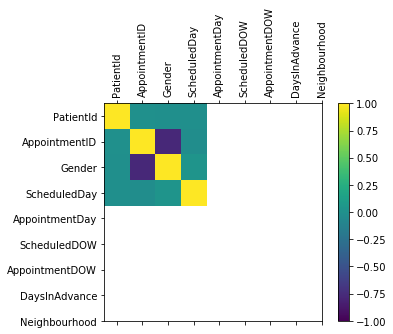

In [15]:
names = list(df.columns.values)
# plot correlation matrix
correlations = df.corr(method='pearson')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90)
ax.set_yticklabels(names)
plt.show()

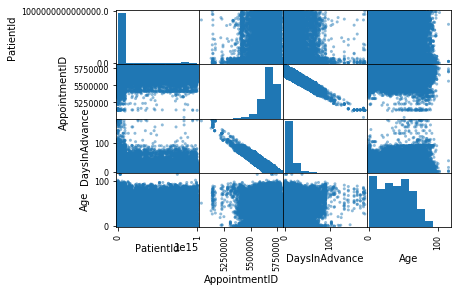

In [16]:
# Scatterplot Matrix - pairwise relationships
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [19]:
import seaborn as sns
sns.set(style="dark")
#df = sns.load_dataset(df)
sns.pairplot(df[tuple([slice(None),1])], hue="NoShow")

TypeError: unhashable type: 'slice'

##### Frequency Tables 

In [20]:
df = df.replace({'NoShow': {'Yes': True, 'No': False}})

In [21]:
#Ref: http://songhuiming.github.io/pages/2016/07/12/python-vs-sas/
#Gender
#Chris suggested I count unique PatientId
x=df.PatientId
x.value_counts(dropna = False).sort_index()
pd.crosstab(df.NoShow,df.Gender).apply(lambda r: r/r.sum(), axis = 1)

Gender,F,M
NoShow,,
False,0.648989,0.351011
True,0.653882,0.346118


In [23]:
#Frequency of missing an appointment based on Appointment Day of Week

pd.crosstab(df.NoShow,df.AppointmentDOW).apply(lambda r: r/r.sum(), axis = 1)

AppointmentDOW,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
NoShow,,,,,,
False,0.169849,0.204347,0.000340,0.157684,0.232269,0.235512
True,0.180877,0.210135,0.000403,0.149559,0.230835,0.228191


In [24]:
#Frequency of missing an appointment based on the day of the week the appointment was made

pd.crosstab(df.NoShow,df.ScheduledDOW).apply(lambda r: r/r.sum(), axis = 1)

ScheduledDOW,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
NoShow,,,,,,
False,0.170370,0.210004,0.000261,0.162944,0.236679,0.219742
True,0.174157,0.204400,0.000045,0.165778,0.237107,0.218513


In [25]:
# let's break up the age variable
df['age_range'] = pd.cut(df.Age,[0,16,65,1e6],3,labels=['child','adult','senior']) # this creates a new variable
df.age_range.describe()

count     106988
unique         3
top        adult
freq       71356
Name: age_range, dtype: object

In [26]:
#now lets group with the new variable
df_grouped = df.groupby(by=['age_range','NoShow'])
print ("Percentage of No Shows in each age group:")
print (df_grouped.NoShow.sum() / df_grouped.PatientId.nunique() *100)

Percentage of No Shows in each age group:
age_range  NoShow
child      False       0.000000
           True      127.886598
adult      False       0.000000
           True      126.890101
senior     False       0.000000
           True      123.786699
dtype: float64


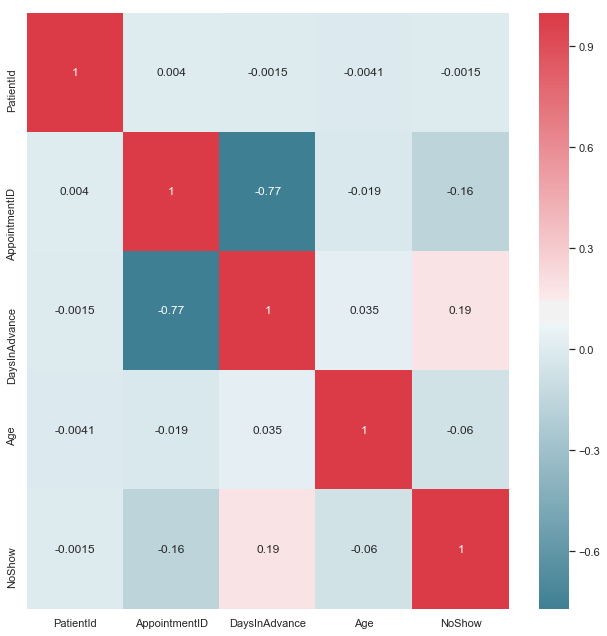

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

C:\Users\carol\AppData\Local\conda\conda\envs\MSDS7331\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'target'

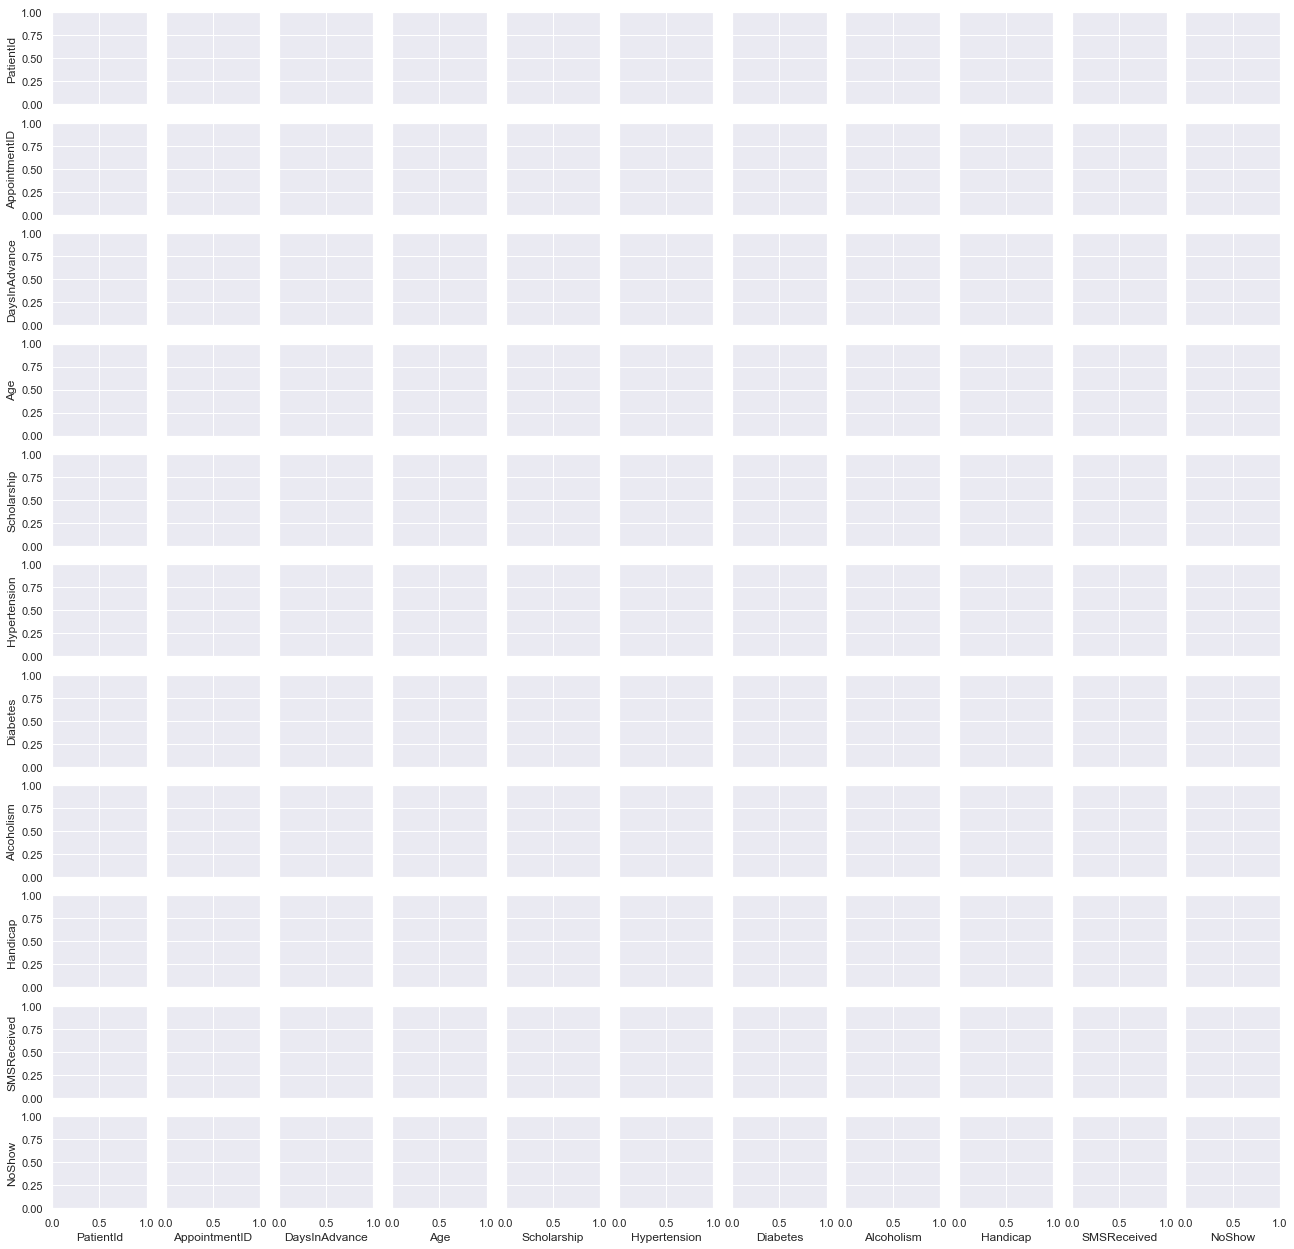

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
sns.set()
sns.pairplot(df, hue="target", size=2)

In [ ]:
sns.set(style="white")

# create a plot grid
g = sns.PairGrid(df[['Age','NoShow','SMSReceived']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d") # use joint kde on the lower triangle
g.map_upper(plt.scatter) # scatter on the upper
g.map_diag(sns.kdeplot, lw=3) # kde histogram on the diagonal